<a href="https://colab.research.google.com/github/steve-burman/machine-learning-intro/blob/master/TensorFlow_SXB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Demo
Steve Burman
303-249-1177

Python welcome message:

check installation:

In [2]:
message = "Welcome to Steve's TensorFlow Demo space"
print( message )

Welcome to Steve's TensorFlow Demo space


# Linear Regression
best fit using objective function:  y = m * x + b

In [33]:
import  matplotlib.pyplot  as plt

%tensorflow_version  2.x
import  tensorflow  as  tf
print( tf.__version__ )

from  tensorflow.keras  import Model

%matplotlib inline

def  createSimulatedData( m=0.1, b=0.3, n=100, stddev=0.1 ):
  x = tf.random.uniform( shape=( n, ) )
  noise = tf.random.normal( shape=( len(x), ), stddev=stddev )
  y = m * x + b + noise
  return x, y

def calculateLineSlope(x1, y1, x2, y2):
  dx = x2 - x1
  dy = y2 - y1
  m = dy / dx
  return m

2.1.0-rc1


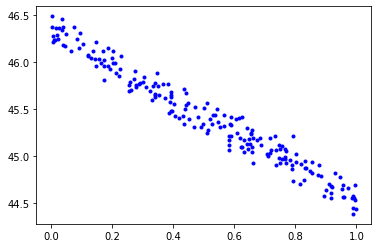

In [34]:
m = calculateLineSlope( 6.9528, 46.3015, 7.0458, 46.1395 )
x_train, y_train = createSimulatedData( m, 46.3015, 200 )
plt.plot( x_train, y_train, 'b.' )

# Computer Vision (recognize objects in images)


Load & prepare MNIST dataset, which is many "Labelled" image files of hand-written digits.

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


Build "Model" using Keras, which calls TensorFlow implementation:

In [0]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Flatten( input_shape=[28, 28] )
     , tf.keras.layers.Dense( 128, activation='relu' )
     , tf.keras.layers.Dropout( 0.2 )
     , tf.keras.layers.Dense( 10, activation='softmax' )
    ]
)

model.compile(
    optimizer = 'adam'
    , loss = 'sparse_categorical_crossentropy'
    , metrics = [ 'accuracy' ]
)


Train & evaluate model:

In [61]:
history = model.fit( x_train, y_train, validation_data=(x_test, y_test), epochs=5 )
history

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2903 - accuracy: 0.9156 - val_loss: 0.1390 - val_accuracy: 0.9571
Epoch 2/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1408 - accuracy: 0.9585 - val_loss: 0.1006 - val_accuracy: 0.9686
Epoch 3/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1055 - accuracy: 0.9678 - val_loss: 0.0893 - val_accuracy: 0.9737
Epoch 4/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0868 - accuracy: 0.9735 - val_loss: 0.0757 - val_accuracy: 0.9743
Epoch 5/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0750 - accuracy: 0.9761 - val_loss: 0.0838 - val_accuracy: 0.9725


In [62]:
eval_results = model.evaluate( x_test, y_test )
eval_results

10000/10000 [==============================] - 0s 43us/sample - loss: 0.0838 - accuracy: 0.9725


[0.08384190348265692, 0.9725]

Show "learning" progress:

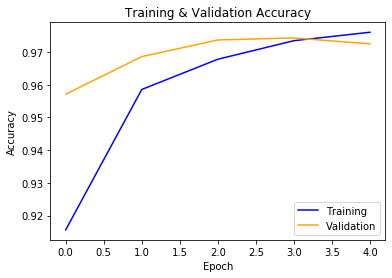

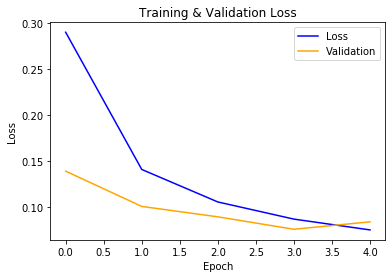

In [63]:
accuracy     = history.history[     'accuracy' ]
val_accuracy = history.history[ 'val_accuracy' ]
loss     = history.history[     'loss' ]
val_loss = history.history[ 'val_loss' ]
epochs = range( len( accuracy ) )

plt.title( 'Training & Validation Accuracy' )
plt.plot( epochs,     accuracy, color='blue',   label='Training' )
plt.plot( epochs, val_accuracy, color='orange', label='Validation' )
plt.xlabel( 'Epoch' )
plt.ylabel( 'Accuracy' )
plt.legend()

_ = plt.figure()

plt.title( 'Training & Validation Loss' )
plt.plot( epochs,     loss, color='blue', label='Loss' )
plt.plot( epochs, val_loss, color='orange', label='Validation' )
plt.xlabel( 'Epoch' )
plt.ylabel( 'Loss' )
plt.legend()